# Individual Exploration and Analysis of the Data

## Import Libraries

In [67]:
import pandas as pd
import numpy as np


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *


In [69]:
df, revert_key, replace_key = wrangle_data()

In [70]:
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


In [71]:
df.shape

(2515, 128)

In [72]:
target = ['is_pes', 'pes_val', 'is_very_pes', 'is_very_opt']
train, validate, test = train_validate_test_split(df, target, seed=123)
train.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
629,201501225040,Mobile phone,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"$30-$74,999",You are NOT registered to vote at your current...,Conservative,Internet User,Yes,0.255606,1,2,0,0
445,677501,Desktop,English,Form 2,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.311190,1,2,0,0
837,201501725531,Tablet,English,Form 2,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,No,2.213155,0,1,0,0
1768,201801100416,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be WEAKER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.662899,0,1,0,0
1634,201801082227,Mobile phone,English,Form 2,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.485645,0,1,0,0


In [73]:
#renaming train to df so explore does not accidentally happen on full dataframe.
df = train

In [117]:
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()
        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)

In [77]:
#set seaborn color pallete
sns.set_palette('plasma')
pal = sns.set_palette('plasma')
print(sns.color_palette().as_hex())

['#5302a3', '#8b0aa5', '#b83289', '#db5c68', '#f48849', '#febd2a']


## Null Hypothesis: Is sex independent of a pessimsitic future outlook?

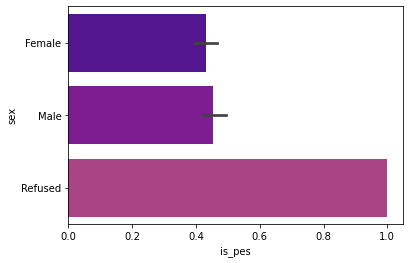

In [94]:
ax = sns.barplot(y="sex", x="is_pes", data=df)

In [93]:
df.sex.value_counts()

Female     780
Male       627
Refused      1
Name: sex, dtype: int64

In [150]:
df[df.is_pes == 1].sex.value_counts()

Female     337
Male       285
Refused      1
Name: sex, dtype: int64

Since there is only 1 respondent who refused, I did not include them in the chart, due to it making the chart misleading.
However, this is may something to look into with a larger subset of data than train. 

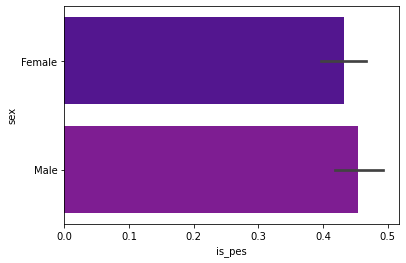

In [144]:
ax = sns.barplot(y="sex", x="is_pes", data=df[df.sex != 'Refused'])
plt.title = "Percentage of Pessimistic Outlook for Females and Males"
plt.savefig('images/fem_male_pessimism_percentage.png')



plt.show()

It appears that is little difference between those who identify male or female and their pessimisitic future outlook.

## Null Hypothesis: Is income independent of a pessimistic future outlook?

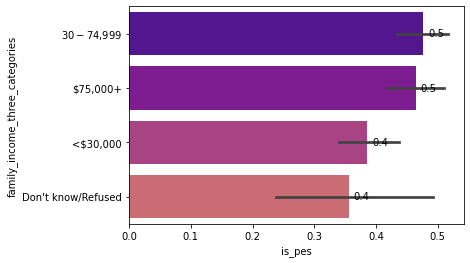

In [151]:
ax = sns.barplot(y="family_income_three_categories", x="is_pes", data=df)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


### It appears that individuals with family income levels of $30,000-$75,000 are the most pessimistic about the future.

In [79]:
def bar_graph_percent_pessimistic(df, x_feature, y_feature):
    ax = sns.barplot(data = df, x = x_feature, y = y_feature)
    title = ax.set(title = f"Percent {x_feature} by {y_feature}")

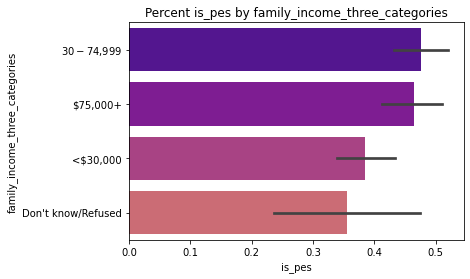

In [80]:
bar_graph_percent_pessimistic(df, "is_pes", "family_income_three_categories")

In [116]:
# Run a statistical test here.
from scipy import stats

stats.ttest_ind(
    df[df.is_pes == '1'].family_income_three_categories,
    df[df.is_pes == '0'].family_income_three_categories,
)

Ttest_indResult(statistic=nan, pvalue=nan)

## Null Hypothesis:  Is marital status independent of a pessimisitic future outlook?

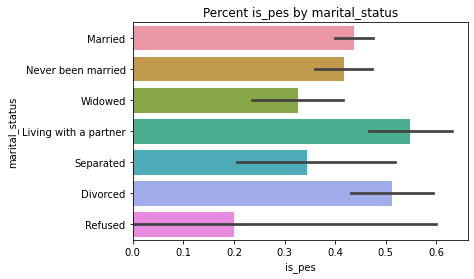

In [81]:
bar_graph_percent_pessimistic(df, "is_pes", "marital_status")

## It appears that living with a partner and being divorced have the most pessimistic future outlook

## Null Hypothesis: Is Education independent of a pessimistic future outlook?


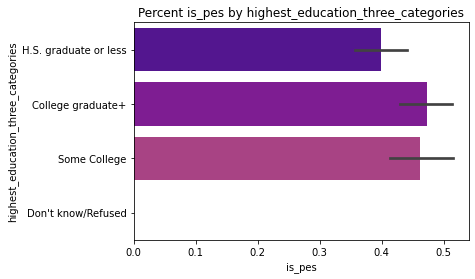

In [82]:
bar_graph_percent_pessimistic(df, "is_pes", "highest_education_three_categories")

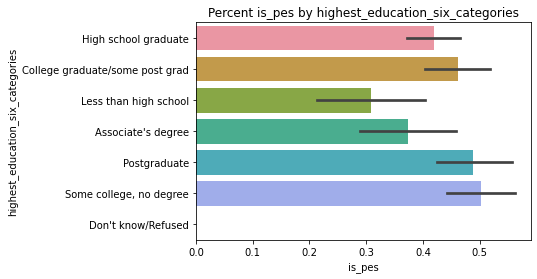

In [83]:
bar_graph_percent_pessimistic(df, "is_pes", "highest_education_six_categories")

## It appears that the more education, the more pessimistic an indivual is regarding the future

## Null Hypothesis: Is residing in a particular region of the country independent of future pessimistic outlook?

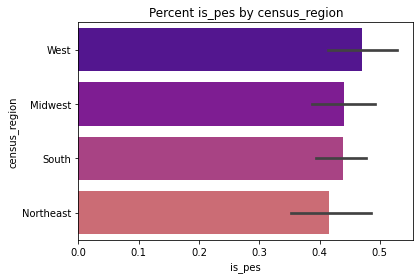

In [85]:
bar_graph_percent_pessimistic(df, "is_pes", "census_region")

## It appears that there is little difference of future outlook based on where an individual resides.

## Null Hypothesis:  Is race and ethnicity independent from a pessimistic future outlook?

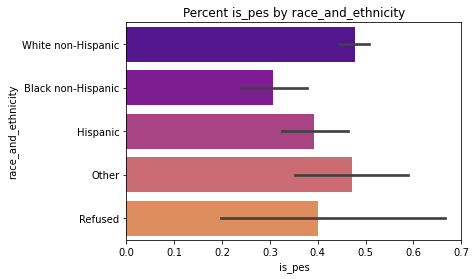

In [86]:
bar_graph_percent_pessimistic(df, "is_pes", "race_and_ethnicity")

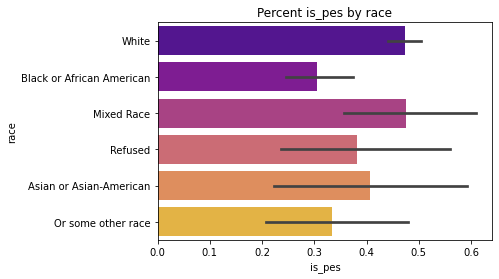

In [88]:
bar_graph_percent_pessimistic(df, "is_pes", "race")

## It appears that those who did not report their race and Black or African Americans are the least likely to be overall pessimistic about the future.

### Considering these charts, what happens when we combine groups together?
## Null Hypothesis: Are those who have a middle income and are highly educated as pessimisitic about the future as those who are not as educated?

In [96]:
df.family_income_three_categories.value_counts()

$30-$74,999           527
$75,000+              433
<$30,000              389
Don't know/Refused     59
Name: family_income_three_categories, dtype: int64

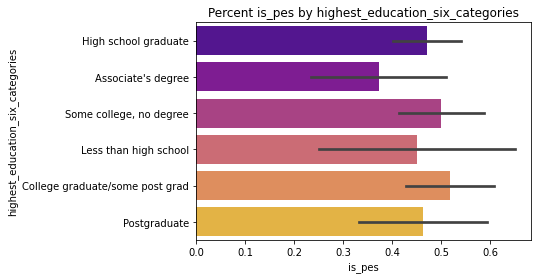

In [97]:
bar_graph_percent_pessimistic(df[df.family_income_three_categories == '$30-$74,999'], "is_pes", "highest_education_six_categories")

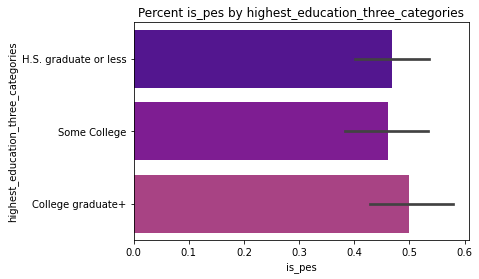

In [98]:
bar_graph_percent_pessimistic(df[df.family_income_three_categories == '$30-$74,999'], "is_pes", "highest_education_three_categories")

## While it does appear that those who have more education are a bit more pessimistic about the future, it is not by much.  This particular subgroup seems to be fairly temperate in their future outlook.

## Staying with grouping by education levels, is there any difference in future outlook in those who are highly educated who are divorced or living with a partner and those who are not highly educated?

In [100]:
df.marital_status.value_counts()

Married                  685
Never been married       305
Divorced                 160
Living with a partner    135
Widowed                   89
Separated                 29
Refused                    5
Name: marital_status, dtype: int64

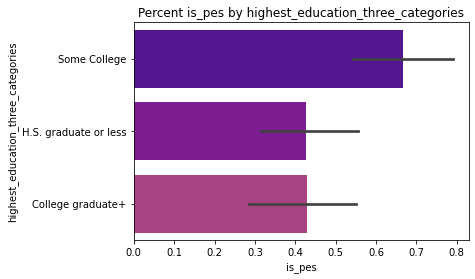

In [108]:
bar_graph_percent_pessimistic(df[df.marital_status == 'Divorced'], "is_pes", "highest_education_three_categories")

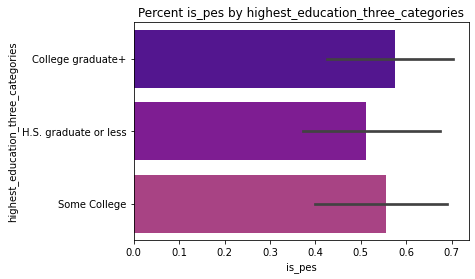

In [109]:
bar_graph_percent_pessimistic(df[df.marital_status == 'Living with a partner'], "is_pes", "highest_education_three_categories")

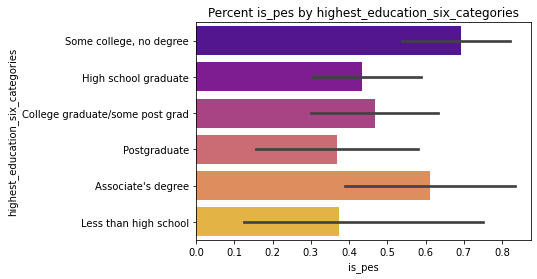

In [110]:
bar_graph_percent_pessimistic(df[df.marital_status == 'Divorced'], "is_pes", "highest_education_six_categories")

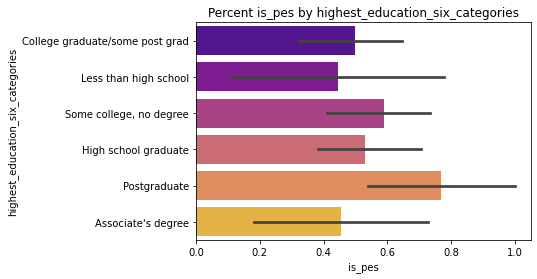

In [111]:
bar_graph_percent_pessimistic(df[df.marital_status == 'Living with a partner'], "is_pes", "highest_education_six_categories")

### From these charts, it appears that those who are divorced and have some college are slightly more pessimistic in their future outlook than those with higher formal education.  On the other hand, those who are living with a partner and have a post graduate degree seem to be more pessimistic in their future outlook than those with less formal education.

In [119]:
target_feature = 'is_pes'
# printout_all_chi_squared(df[df.highest_education_six_categories == 'Postgraduate'], target_feature)
get_list_of_significant_columns(df[df.highest_education_six_categories == 'Postgraduate'], target_feature)

['attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_climate',
 'elder_care',
 'priority_increase_military',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'robot_replacement_means_better_jobs_for_humans',
 'share_americans_in_lower_class',
 'ethnic_conflict',
 'sci_tech',
 'major_corps',
 'gov_in_wash',
 'military',
 'schools',
 'pes_val',
 'is_very_pes',
 'is_very_opt']

In [120]:
target_feature = 'is_pes'
# printout_all_chi_squared(df[df.highest_education_six_categories == 'Postgraduate'], target_feature)
get_list_of_significant_columns(df[df.marital_status == 'Living with a partner'], target_feature)

['attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_china',
 'happen_70yr_labor',
 'happen_anti_semitism',
 'envir_50yrs',
 'pop_growth',
 'worry_government',
 'worry_leaders',
 'elder_care',
 'priority_infra_f1',
 'priority_increase_military',
 'priority_climate',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'replacement_by_robots_good_or_bad',
 'robot_replacement_means_better_jobs_for_humans',
 'share_americans_in_middle_class',
 'ethnic_conflict',
 'ethnic_customs',
 'ss_money',
 'fut_marriage',
 'gov_in_wash',
 'race',
 'race_and_ethnicity',
 'pes_val',
 'is_very_pes',
 'is_very_opt']

In [122]:
pd.crosstab(df.highest_education_six_categories, df.is_pes, margins=True)

is_pes,0,1,All
highest_education_six_categories,,,
Associate's degree,74,44,118
College graduate/some post grad,155,133,288
Don't know/Refused,3,0,3
High school graduate,242,175,417
Less than high school,65,29,94
Postgraduate,113,108,221
"Some college, no degree",133,134,267
All,785,623,1408


In [123]:
pd.crosstab(df.marital_status, df.is_pes, margins=True)

is_pes,0,1,All
marital_status,,,
Divorced,78,82,160
Living with a partner,61,74,135
Married,385,300,685
Never been married,178,127,305
Refused,4,1,5
Separated,19,10,29
Widowed,60,29,89
All,785,623,1408


In [124]:

target_feature = 'is_pes'
# printout_all_chi_squared(df[df.highest_education_six_categories == 'Postgraduate'], target_feature)
get_list_of_significant_columns(df[df.family_income_three_categories == '$30-$74,999'], target_feature)


['device_type',
 'attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_alzheimers',
 'happen_china',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'pop_growth',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_climate',
 'elder_care',
 'elder_finance_1',
 'priority_science',
 'priority_inequality',
 'priority_pub_hcare_f2',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'share_americans_in_middle_class',
 'share_americans_in_lower_class',
 'harass_unbelieved_f1',
 'harass_sexual_personal_exp',
 'ethnic_conflict',
 'ethnic_customs',
 'age_impact',
 'fut_marriage',
 'fut_kids',
 'major_corps',
 'gov_in_wash',
 'state_local',
 'medi

In [125]:
mid_income = df[df.family_income_three_categories == '$30-$74,999']

In [129]:
pd.crosstab(mid_income.marital_status, df.is_pes, margins=True)

is_pes,0,1,All
marital_status,,,
Divorced,31,35,66
Living with a partner,27,24,51
Married,144,116,260
Never been married,48,53,101
Separated,5,5,10
Widowed,21,18,39
All,276,251,527


In [130]:
pd.crosstab(mid_income.highest_education_six_categories, df.is_pes, margins=True)

is_pes,0,1,All
highest_education_six_categories,,,
Associate's degree,32,19,51
College graduate/some post grad,54,58,112
High school graduate,92,82,174
Less than high school,11,9,20
Postgraduate,29,25,54
"Some college, no degree",58,58,116
All,276,251,527


In [131]:
pd.crosstab(mid_income.job_security, df.is_pes, margins=True)

is_pes,0,1,All
job_security,,,
About the same,137,78,215
Less job security,108,160,268
More job security,31,13,44
All,276,251,527


In [132]:
pd.crosstab(mid_income.job_benefits, df.is_pes, margins=True)

is_pes,0,1,All
job_benefits,,,
About the same as they are now,112,82,194
Better than they are now,72,28,100
Not as good as they are now,90,140,230
Refused,2,1,3
All,276,251,527


In [133]:
get_list_of_significant_columns(mid_income, target_feature)

['device_type',
 'attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_alzheimers',
 'happen_china',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'pop_growth',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_climate',
 'elder_care',
 'elder_finance_1',
 'priority_science',
 'priority_inequality',
 'priority_pub_hcare_f2',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'share_americans_in_middle_class',
 'share_americans_in_lower_class',
 'harass_unbelieved_f1',
 'harass_sexual_personal_exp',
 'ethnic_conflict',
 'ethnic_customs',
 'age_impact',
 'fut_marriage',
 'fut_kids',
 'major_corps',
 'gov_in_wash',
 'state_local',
 'medi

In [40]:
df.weight

629     0.255606
445     0.311190
837     2.213155
1768    0.662899
1634    0.485645
          ...   
730     1.712536
2098    0.652492
1834    0.296653
162     0.704562
1076    1.142317
Name: weight, Length: 1408, dtype: float64

In [42]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
         
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()
        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    def get_ordered_p_values(df, target_feature):
        '''
        This function calculates the p value for each categorical feature's chi-squared 
        test with the target feature. The function the creates a DataFrame with the ordered 
        by values of each feature.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        #Make list of categorical features
        categorical_feature_list = []
        
        #Make list of p_values 
        p_values = []
        
        #Loop through categorical features
        for col in categorical_features:
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #append categorical feature to list
            categorical_feature_list.append(col)
            
            #append p value to list
            p_values.append(p)
        
        df = pd.DataFrame(list(zip(categorical_feature_list, p_values)),
               columns =['Feature', 'p_value'])
        
        df = df.sort_values(by = 'p_value', ascending = True)
        
        return df
        
                          
                          
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        for col in columns_to_drop:
            df = df.drop(columns = [col])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        
        for col in columns_to_drop:
            df = df.drop(columns = [col])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_graph_percent_pessimistic(df, x_feature, y_feature):
        ax = sns.barplot(data = df, x = x_feature, y = y_feature)
        title = ax.set(title = f"Percent {x_feature} by {y_feature}")

In [43]:
Attitudes_explore.printout_all_chi_squared(df, 'is_pes')

Correlation between device_type and the target
(2.4222752290790903, 0.29785823875452067, 2, array([[272.63139205, 216.36860795],
       [425.95170455, 338.04829545],
       [ 86.41690341,  68.58309659]]))
 
Correlation between language and the target
(4.499565890588359, 0.03390345945915584, 1, array([[773.29190341, 613.70809659],
       [ 11.70809659,   9.29190341]]))
 
Correlation between form and the target
(1.5953776475028723, 0.206559497487583, 1, array([[390.26988636, 309.73011364],
       [394.73011364, 313.26988636]]))
 
Correlation between attitude and the target
(1408.0, 5.410460725618397e-305, 3, array([[347.34019886, 275.65980114],
       [251.4453125 , 199.5546875 ],
       [ 90.31960227,  71.68039773],
       [ 95.89488636,  76.10511364]]))
 
Correlation between avg_family and the target
(472.9443017926664, 3.481049392640573e-102, 3, array([[162.79829545, 129.20170455],
       [351.24289773, 278.75710227],
       [  2.78764205,   2.21235795],
       [268.17116477, 212.8288

## Correlations from above barcharts. 
## Takeaways: census_region, age, sex are independent from the target; however- education, race, and race_and_ethnicity are indeed related to the target.

Correlation between census_region and the target
(1.6645059120238437, 0.6448535563410824, 3, array([[199.59517045, 158.40482955],
       [129.90411932, 103.09588068],
       [291.02982955, 230.97017045],
       [164.47088068, 130.52911932]]))
 
Correlation between age and the target
(3.598041187431689, 0.4631283610253588, 4, array([[126.55894886, 100.44105114],
       [253.11789773, 200.88210227],
       [236.39204545, 187.60795455],
       [167.25852273, 132.74147727],
       [  1.67258523,   1.32741477]]))
 
Correlation between sex and the target
(1.9738721013236173, 0.37271692910242, 2, array([[434.87215909, 345.12784091],
       [349.5703125 , 277.4296875 ],
       [  0.55752841,   0.44247159]]))
 
Correlation between highest_education_three_categories and the target
(8.855918810047392, 0.031269146662630753, 3, array([[283.78196023, 225.21803977],
       [  1.67258523,   1.32741477],
       [284.89701705, 226.10298295],
       [214.6484375 , 170.3515625 ]]))
 
Correlation between highest_education_six_categories and the target
(18.58356982095694, 0.0049278949258195655, 6, array([[ 65.78835227,  52.21164773],
       [160.56818182, 127.43181818],
       [  1.67258523,   1.32741477],
       [232.48934659, 184.51065341],
       [ 52.40767045,  41.59232955],
       [123.21377841,  97.78622159],
       [148.86008523, 118.13991477]]))
 
 
Correlation between race and the target
(21.522664891308484, 0.0006450713601381321, 5, array([[ 15.05326705,  11.94673295],
       [104.2578125 ,  82.7421875 ],
       [ 32.89417614,  26.10582386],
       [ 26.76136364,  21.23863636],
       [ 18.95596591,  15.04403409],
       [587.07741477, 465.92258523]]))
 
Correlation between race_and_ethnicity and the target
(20.97373242604253, 0.00032048922588818855, 4, array([[102.02769886,  80.97230114],
       [108.16051136,  85.83948864],
       [ 37.91193182,  30.08806818],
       [  8.36292614,   6.63707386],
       [528.53693182, 419.46306818]]))

In [11]:
Attitudes_explore.printout_only_significant_p_value(df, 'is_pes')

Correlation between device_type and the target
6.29292188398888 0.04300405170652329 2 [[491.46838966 389.53161034]
 [746.40715706 591.59284294]
 [165.12445328 130.87554672]]
 
Correlation between language and the target
8.690770756807046 0.003198253506670426 1 [[1380.68588469 1094.31411531]
 [  22.31411531   17.68588469]]
 
Correlation between attitude and the target
2515.0 0.0 3 [[620.89025845 492.10974155]
 [449.62942346 356.37057654]
 [161.77733598 128.22266402]
 [170.70298211 135.29701789]]
 
Correlation between avg_family and the target
746.5691997793398 1.6734538514704303e-161 3 [[283.38926441 224.61073559]
 [614.75387674 487.24612326]
 [  4.46282306   3.53717694]
 [500.39403579 396.60596421]]
 
Correlation between happen_general and the target
527.8865032279894 2.3491042383510088e-115 2 [[113.24413519  89.75586481]
 [545.0222664  431.9777336 ]
 [744.73359841 590.26640159]]
 
Correlation between happen_health and the target
247.3963929698816 1.8991350330200725e-54 2 [[796.6139165

In [70]:
significant_features = Attitudes_explore.get_list_of_significant_columns(df, 'new_target')
significant_features

['NEW_Device_Type_W41',
 'F_LANGUAGE',
 'AVGFAM_W41',
 'HAPPENa_W41',
 'HAPPENb_W41',
 'HAPPENc_W41',
 'HAPPENd_W41',
 'HAPPENe_W41',
 'HAPPENf_W41',
 'HAPPENg_W41',
 'HAPPENhF1_W41',
 'HAPPENiF2_W41',
 'HAPPENj_W41',
 'HAPPEN2a_W41',
 'HAPPEN2b_W41',
 'HAPPEN2c_W41',
 'HAPPEN2d_W41',
 'HAPPEN2g_W41',
 'HAPPEN2h_W41',
 'NATDEBT_W41',
 'ENVC_W41',
 'POPPROB_W41',
 'FTRWORRYa_W41',
 'FTRWORRYb_W41',
 'FTRWORRYc_W41',
 'FTRWORRYd_W41',
 'FTRWORRYe_W41',
 'FTRWORRYf_W41',
 'ELDCARE_W41',
 'GOVPRIOb_W41',
 'GOVPRIOc_W41',
 'GOVPRIOe_W41',
 'GOVPRIOfF1_W41',
 'GOVPRIOhF1_W41',
 'GOVPRIOjF1_W41',
 'GOVPRIOkF2_W41',
 'GOVPRIOlF2_W41',
 'GOVPRIOnF2_W41',
 'GOVPRIOoF2_W41',
 'GNATPROB_W41',
 'JOBSECURITY_W41',
 'JOBBENEFITS_W41',
 'AUTOWKPLC_W41',
 'ROBWRK_W41',
 'ROBWRK2_W41',
 'ROBIMPACTa_W41',
 'ROBIMPACTb_W41',
 'LEGALIMG_W41',
 'FUTRCLASSb_W41',
 'FUTRCLASSc_W41',
 'HARASS1F1b_W41',
 'HARASS1NOWRKF2a_W41',
 'HARASS5_W41',
 'ETHNCMAJMOD_W41',
 'ETHNCMAJ3_W41',
 'ETHNCMAJ4_W41',
 'AGEMAJ_W41'

In [15]:
Attitudes_explore.printout_insignificant_p_value(df, 'is_pes')

Correlation between form and the target
0.27507226107480987 0.5999493733871726 1 [[693.96898608 550.03101392]
 [709.03101392 561.96898608]]
 
Correlation between happen_female_pres and the target
1.9919596021313208 0.7372378268884358 4 [[  6.69423459   5.30576541]
 [421.17892644 333.82107356]
 [ 26.21908549  20.78091451]
 [800.51888668 634.48111332]
 [148.3888668  117.6111332 ]]
 
Correlation between happen_hispanic_pres and the target
8.087576877171646 0.0884223100944941 4 [[ 12.27276342   9.72723658]
 [159.54592445 126.45407555]
 [ 77.5415507   61.4584493 ]
 [754.21709742 597.78290258]
 [399.42266402 316.57733598]]
 
Correlation between elder_finance_1 and the target
2.6376762672449585 0.4509226625196344 3 [[248.50562701 192.49437299]
 [185.95659164 144.04340836]
 [260.90273312 202.09726688]
 [  5.63504823   4.36495177]]
 
Correlation between elder_finance_2 and the target
0.934792194357521 0.8170245581730016 3 [[111.01652242  89.98347758]
 [373.36900079 302.63099921]
 [200.49252557 

In [16]:
insignificant_features = Attitudes_explore.get_list_of_insignificant_columns(df, 'is_pes')
insignificant_features

['form',
 'happen_female_pres',
 'happen_hispanic_pres',
 'elder_finance_1',
 'elder_finance_2',
 'priority_debt',
 'priority_science',
 'priority_undocumented_immigration',
 'priority_infra_f1',
 'priority_pub_hcare_f2',
 'most_responsible_for_workers_f1',
 'job_skills_f2',
 'second_most_responsible_for_workers_f1',
 'second_most_responsible_for_workers_f2',
 'likelihood_my_job_replaced_by_robots',
 'share_americans_in_upper_class',
 'harass_false_f1',
 'harass_unpunished_f1',
 'harass_unbelieved_f1',
 'harass_unpunished_f2',
 'harass_unbelieved_f2',
 'harass_interactions_f1',
 'harass_interactions_f2',
 'harass_personal_exp',
 'ss_cut',
 'sci_tech',
 'metro',
 'census_region',
 'sex',
 'birthplace',
 'evangelical_christian',
 'political_party_identity',
 'political_party_lean',
 'summary_of_political_party_data',
 'registered_to_vote',
 'volunteer']

In [38]:
columns_to_drop = ['pes_val', 'is_very_pes', 'is_very_opt',
                  'attitude']

In [35]:
columns_to_drop = []

In [36]:
Attitudes_explore.get_k_best(df, 6, 'is_pes', columns_to_drop)

Index(['pes_val', 'attitude_Somewhat pessimistic', 'attitude_Very pessimistic',
       'avg_family_Get worse',
       'happen_general_The U.S. economy will be STRONGER',
       'happen_general_The U.S. economy will be WEAKER'],
      dtype='object')

In [45]:
Attitudes_explore.get_k_best(df, 50, 'is_pes', columns_to_drop)

Index(['avg_family_Get worse', 'avg_family_Stay about the same',
       'happen_general_The U.S. economy will be STRONGER',
       'happen_general_The U.S. economy will be WEAKER',
       'happen_health_Health care will be MORE affordable',
       'happen_race_Race relations will IMPROVE',
       'happen_usa_The U.S. will be LESS important in the world',
       'happen_usa_The U.S. will be MORE important in the world',
       'happen_wealthgap_The gap between the rich and the poor will GET SMALLER',
       'happen_wealthgap_The gap between the rich and the poor will GROW',
       'happen_pub_ed_The public education system will GET WORSE',
       'happen_pub_ed_The public education system will IMPROVE',
       'happen_rel_Religion will become LESS important',
       'happen_65up_f1_People 65 and older will have a WORSE standard of living',
       'happen_child_f2_Children will have a WORSE standard of living',
       'happen_politics_The country will be LESS politically divided',
      

In [41]:
Attitudes_explore.get_recursive_features(df, 6, 'is_pes', columns_to_drop)

Index(['second_most_responsible_for_workers_f1_Refused',
       'highest_education_three_categories_Don't know/Refused',
       'highest_education_six_categories_Don't know/Refused',
       'highest_education_six_categories_Less than high school',
       'hispanic_or_latino_Yes', 'family_income_three_categories_<$30,000'],
      dtype='object')

In [44]:
Attitudes_explore.get_recursive_features(df, 50, 'is_pes', columns_to_drop)

Index(['avg_family_Get worse',
       'happen_general_The U.S. economy will be WEAKER',
       'happen_alzheimers_Will definitely happen',
       'happen_alzheimers_Will definitely not happen',
       'happen_alzheimers_Will probably happen',
       'happen_alzheimers_Will probably not happen', 'debt_30yrs_Refused',
       'worry_morals_Refused', 'priority_healthcare_Refused',
       'priority_increase_social_security_Refused', 'priority_climate_Refused',
       'second_most_responsible_for_workers_f1_Refused',
       'replacement_by_robots_good_or_bad_Refused',
       'share_americans_in_lower_class_Refused',
       'harass_interactions_f1_Refused', 'rel_groups_Refused',
       'gov_in_wash_Refused', 'college_uni_Refused', 'age_DK/REF',
       'highest_education_three_categories_Don't know/Refused',
       'highest_education_three_categories_H.S. graduate or less',
       'highest_education_three_categories_Some College',
       'highest_education_six_categories_College graduate/some 

In [25]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df: pd.DataFrame, target: str):
        '''
        Initializes the self of the class.
        '''
        self.target = target
        
        # Pull the categorical features from dataframe
        self.categorical_features = df.drop(columns = ['qkey', "weight", target]).columns.to_list()
        
        # Split the dataframe
        train, validate, test = train_validate_test_split(df, target)
        
        # Make train datasets
        self.X_train = train.drop(columns=[target])
        self.y_train = train[target]
        
        # Make validate datasets
        self.X_validate = validate.drop(columns=[target])
        self.y_validate = validate[target]
        
        # Make test datasets
        self.X_test = test.drop(columns=[target])
        self.y_test = test[target]
        
        
        
    def run_statistical_tests(self):
        '''This method will iterate though the categorical feature columns and run various statistical tests
        and will print the results for each test.
        The tests being performed are:
        chi_squared
        significant_p_val
        list_significant_columns
        insignificant_p_val
        list_insignificant_columns
        '''
        
        # Create column_based_dict statistic attributes
        self.chi2_df = pd.DataFrame(columns=['chi2', 'p_val', 'deg_free', 'expected_freq'])
        
        # Iterate through the categorical features
        for col in self.categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(self.X_train[col], self.y_train)
            
            #Get test results of chi-squared test
            chi2, p, deg_free, expect_freq = stats.chi2_contingency(contingency_table)
            # Add to the dataframe
            self.chi2_df.loc[col]= [chi2, p, deg_free, expect_freq]
    
    def plot_bar_graphs(self, n=5, saved=False):
        '''Plots the target and each variable for top 'n' results from the chi2 test
        '''
        # Select the n most relevant p_vals
        for col in self.chi2_df.head(n).index:
            sns.barplot(x = self.y_train, y = self.X_train[col]).set_title(
            label = f'Percent {self.target} by {col}')
            if saved:
                plt.savefig(f'images/{col.lower()}_bar_plot.png')
            plt.show()

In [1]:
df.family_income_three_categories.value_counts()

NameError: name 'df' is not defined

In [ ]:
# This will drop the columns that you don't want to target yet
tmp = df[[col for col in df.columns if col not in ['pes_val', 'is_very_pes', 'is_very_opt']]]

YOUR_SUBSET = df[df.colyouwan == 'Value youre interested in']

# Create instance
YOUR_SUBSETASANAME = Attitudes_explore(YOUR_subset, target='is_pes')

In [ ]:
# Create accessable dict results
YOUR_SUBSETASANAME.run_statistical_tests()

In [ ]:
YOURSUBSET_df = YOUR_SUBSETASANANE.chi2_df

# Men and Women

In [26]:
# This will drop the columns that you don't want to target yet
tmp = df[[col for col in df.columns if col not in ['pes_val', 'is_very_pes', 'is_very_opt']]]

female_subset = df[df.sex == 'Female']

# Create instance
females = Attitudes_explore(female_subset, target='is_pes')

In [27]:
# Create accessable dict results
females.run_statistical_tests()

In [28]:
females_df = females.chi2_df

In [29]:
females_df

,chi2,p_val,deg_free,expected_freq
device_type,1.746336,4.176264e-01,2,"[[130.3083870967742, 98.6916129032258], [261.1..."
language,0.697593,4.035936e-01,1,"[[433.0335483870968, 327.9664516129032], [7.96..."
form,0.452392,5.012011e-01,1,"[[207.12774193548387, 156.87225806451613], [23..."
attitude,775.000000,1.142980e-167,3,"[[203.14451612903227, 153.85548387096773], [14..."
avg_family,174.632763,1.271880e-37,3,"[[69.99096774193548, 53.009032258064515], [207..."
...,...,...,...,...
internet_access,2.936302,8.660879e-02,1,"[[411.4103225806452, 311.5896774193548], [29.5..."
volunteer,3.219554,1.999322e-01,2,"[[262.3238709677419, 198.67612903225807], [1.1..."
pes_val,775.000000,1.142980e-167,3,"[[47.79870967741935, 36.20129032258065], [203...."
is_very_pes,116.854509,3.089178e-27,1,"[[394.9083870967742, 299.0916129032258], [46.0..."


In [30]:
important_issues_f = females_df[females_df.p_val < 0.05]

In [40]:
female_important_issues= important_issues_f.index.to_list()

In [41]:
male_subset = df[df.sex == 'Male']

# Create instance
males = Attitudes_explore(male_subset, target='is_pes')

In [42]:
males.run_statistical_tests()

In [43]:
males_df = males.chi2_df

In [44]:
important_issues_m = males_df[males_df.p_val < 0.05]

In [45]:
male_important_issues = important_issues_m.index.to_list()

In [46]:
male_important_issues

['language',
 'attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_rel',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_alzheimers',
 'happen_china',
 'happen_70yr_labor',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'pop_growth',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_climate',
 'elder_care',
 'priority_healthcare',
 'priority_increase_military',
 'priority_reducing_spending_infrastructure',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'replacement_by_robots_good_or_bad',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'share_americans_in_middle_class',
 'share_americans_in_lower_class',
 'harass_false_f2',
 'ethnic_conflict',
 'age_impact',
 'inter_mar',
 'ss_money',
 'fut_kids',
 'major_corps',
 

In [47]:
important_to_women_not_men = list(set(female_important_issues).difference(male_important_issues))

In [48]:
important_to_women_not_men

['harass_fired_f1',
 'happen_hispanic_pres',
 'race_and_ethnicity',
 'race',
 'harass_personal_exp',
 'fut_marriage',
 'harass_sexual_personal_exp',
 'priority_reduce_military',
 'fut_abortion',
 'fut_divorce',
 'priority_avoid_tax_increase',
 'hispanic_or_latino',
 'marital_status']

<AxesSubplot:xlabel='sex', ylabel='is_pes'>

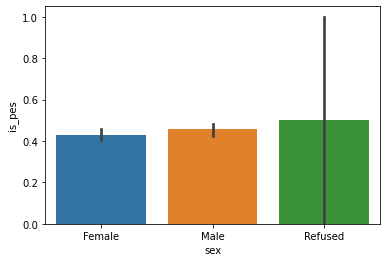

In [50]:
sns.barplot(x = df.sex, y = df.is_pes)

# Republican v Democrat

In [ ]:
# This will drop the columns that you don't want to target yet
tmp = df[[col for col in df.columns if col not in ['pes_val', 'is_very_pes', 'is_very_opt']]]

republican_subset = df[df.sex == 'Female']

# Create instance
republicans = Attitudes_explore(republican_subset, target='is_pes')

In [29]:
females = df[df.sex == "Female"]

In [49]:
p_values_df_females = Attitudes_explore.get_ordered_p_values(females, 'is_pes')

In [50]:
p_values_df_females.head(30)

,Feature,p_value
122,pes_val,5.297238e-300
3,attitude,5.297238e-300
4,avg_family,1.671140e-77
123,is_very_pes,4.971783e-54
5,happen_general,1.035953e-52
10,happen_pub_ed,5.383230e-47
13,happen_child_f2,6.164693e-39
7,happen_race,4.051008e-33
8,happen_usa,4.109372e-29
124,is_very_opt,6.446622e-29


In [36]:
insignificant_issues_female = Attitudes_explore.get_list_of_insignificant_columns(females, 'is_pes')

In [37]:
insignificant_issues_male = Attitudes_explore.get_list_of_insignificant_columns(males, 'is_pes')

In [38]:
list(set(insignificant_issues_female).difference(insignificant_issues_male))

['ethnic_impact1',
 'priority_reducing_spending_infrastructure',
 'inter_mar',
 'share_americans_in_upper_class',
 'language',
 'internet_access',
 'priority_avoid_tax_increase',
 'highest_education_six_categories']

The above issues are significant for men but not for women.

In [39]:
list(set(insignificant_issues_male).difference(insignificant_issues_female))

['priority_reduce_military',
 'fut_abortion',
 'harass_fired_f1',
 'most_responsible_for_workers_f1',
 'harass_false_f1',
 'age',
 'family_income_three_categories',
 'harass_sexual_personal_exp',
 'harass_personal_exp',
 'marital_status',
 'priority_more_immigration',
 'ss_cut',
 'replacement_by_robots_likelihood']

The above issues are significant for women but not for men. 

In [40]:
df.columns.to_list()

['qkey',
 'device_type',
 'language',
 'form',
 'attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_rel',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_alzheimers',
 'happen_china',
 'happen_female_pres',
 'happen_hispanic_pres',
 'happen_70yr_labor',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'pop_growth',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_climate',
 'elder_care',
 'elder_finance_1',
 'elder_finance_2',
 'priority_debt',
 'priority_education',
 'priority_healthcare',
 'priority_science',
 'priority_inequality',
 'priority_reduce_military',
 'priority_undocumented_immigration',
 'priority_increase_social_security',
 'priority_infra_f1',
 'priority_avoid_tax_increase',
 'priority_increase_military',
 'priority_more_immigration',
 'priority_pub_hcare_f2'

In [56]:
df.age.value_counts()

30-49     813
50-64     748
65+       558
18-29     393
DK/REF      3
Name: age, dtype: int64

In [61]:
thirty_forty = df[df.age == "30-49"]
fifty_sixty = df[df.age == "50-64"]
over_sixty_five = df[df.age == '65+']
young = df[df.age == '18-29']

In [62]:
Attitudes_explore.get_ordered_p_values(thirty_forty, 'is_pes').head(30)

,Feature,p_value
122,pes_val,6.558608e-176
3,attitude,6.558608e-176
4,avg_family,1.778057e-45
5,happen_general,4.637309e-34
123,is_very_pes,1.315560e-33
10,happen_pub_ed,2.983440e-30
13,happen_child_f2,9.575702e-24
124,is_very_opt,3.066307e-21
6,happen_health,2.587548e-20
8,happen_usa,6.702416e-19


In [63]:
Attitudes_explore.get_ordered_p_values(fifty_sixty, 'is_pes').head(30)

,Feature,p_value
122,pes_val,8.190946e-162
3,attitude,8.190946e-162
4,avg_family,2.293688e-50
5,happen_general,3.384553e-37
123,is_very_pes,3.317513e-30
10,happen_pub_ed,2.480906e-29
7,happen_race,1.968310e-23
13,happen_child_f2,1.965421e-20
55,job_security,3.199239e-19
124,is_very_opt,1.309633e-18


In [64]:
Attitudes_explore.get_ordered_p_values(over_sixty_five, 'is_pes').head(30)

,Feature,p_value
122,pes_val,1.281955e-120
3,attitude,1.281955e-120
4,avg_family,3.882708e-39
5,happen_general,6.231701e-32
10,happen_pub_ed,3.922844e-26
13,happen_child_f2,7.056035e-24
7,happen_race,4.394388e-20
123,is_very_pes,5.425062e-19
14,happen_politics,3.492314e-15
8,happen_usa,5.855148e-15


In [65]:
Attitudes_explore.get_ordered_p_values(young, 'is_pes').head(30)

,Feature,p_value
122,pes_val,7.267274e-85
3,attitude,7.267274e-85
4,avg_family,1.190254e-27
123,is_very_pes,1.404970e-17
5,happen_general,1.588264e-16
10,happen_pub_ed,9.175369e-15
55,job_security,5.516732e-11
13,happen_child_f2,8.325058e-11
124,is_very_opt,3.011818e-09
7,happen_race,5.427238e-09


In [70]:
significant_issues_thirty_forty= Attitudes_explore.get_list_of_significant_columns(thirty_forty, 'is_pes')

In [71]:
significant_issues_thirty_forty

['attitude',
 'avg_family',
 'happen_general',
 'happen_health',
 'happen_race',
 'happen_usa',
 'happen_wealthgap',
 'happen_pub_ed',
 'happen_rel',
 'happen_65up_f1',
 'happen_child_f2',
 'happen_politics',
 'happen_terroist',
 'happen_energy',
 'happen_alzheimers',
 'happen_china',
 'happen_70yr_labor',
 'happen_anti_semitism',
 'debt_30yrs',
 'envir_50yrs',
 'pop_growth',
 'worry_economy',
 'worry_public_schools',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_climate',
 'elder_care',
 'priority_education',
 'priority_inequality',
 'priority_increase_social_security',
 'priority_increase_military',
 'priority_more_immigration',
 'priority_reducing_spending_infrastructure',
 'worries_federal_government',
 'job_security',
 'job_benefits',
 'automation_good_or_bad',
 'replacement_by_robots_good_or_bad',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'legal_immigration_levels',
 'share_americans_in_middle_class',
 'share_a

In [72]:
significant_issues_fifty_sixty = Attitudes_explore.get_list_of_significant_columns(fifty_sixty, 'is_pes')

In [74]:
significant_issues_sixty_five = Attitudes_explore.get_list_of_significant_columns(over_sixty_five, 'is_pes')

In [75]:
significant_issues_young = Attitudes_explore.get_list_of_significant_columns(young, 'is_pes')

In [79]:
list(set(significant_issues_thirty_forty).difference(significant_issues_fifty_sixty).difference(significant_issues_sixty_five).difference(significant_issues_young))

['sex',
 'priority_increase_social_security',
 'harass_false_f2',
 'priority_more_immigration',
 'inter_mar',
 'race']

The above issues are significant issues for people in the 30-49 age range, but not the other age ranges. 

In [81]:
list(set(significant_issues_fifty_sixty).difference(significant_issues_sixty_five).difference(significant_issues_thirty_forty).difference(significant_issues_young))

['priority_reduce_military',
 'harass_fired_f1',
 'highest_education_six_categories',
 'replacement_by_robots_likelihood']

The above issues are significant for people in the fifty to sixty five age range, but not the other groups.

In [82]:
list(set(significant_issues_young).difference(significant_issues_sixty_five).difference(significant_issues_thirty_forty).difference(significant_issues_fifty_sixty))

['happen_female_pres',
 'priority_healthcare',
 'device_type',
 'second_most_responsible_for_workers_f2',
 'ss_cut',
 'summary_of_political_party_data']

The following issues are significant for young people, but not other groups. 

In [83]:
list(set(significant_issues_sixty_five).difference(significant_issues_young).difference(significant_issues_thirty_forty).difference(significant_issues_fifty_sixty))

['happen_hispanic_pres',
 'form',
 'sci_tech',
 'political_party_identity',
 'marital_status',
 'harass_interactions_f2']

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression


In [12]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df: pd.DataFrame, target: str, seed=123):
    '''This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''

    train_validate, test = train_test_split(df, test_size=0.2, 

                                            random_state=seed, 

                                            stratify=df[target])

    train, validate = train_test_split(train_validate, test_size=0.3, 

                                       random_state=seed,

                                       stratify=train_validate[target])

    return train, validate, test

In [13]:
train, validate, test = train_validate_test_split(df, 'is_pes', seed=123)

In [21]:
X_train= train[['device_type', 'avg_family', 'happen_health', 'happen_race', 'happen_pub_ed', 'happen_rel', 'happen_65up_f1', 'happen_child_f2', 
'happen_terroist', 'happen_energy', 'happen_alzheimers', 'happen_china', 'happen_female_pres', 'happen_hispanic_pres', 'happen_70yr_labor', 
'happen_anti_semitism', 'debt_30yrs', 'envir_50yrs', 'pop_growth', 'worry_economy', 'worry_public_schools', 'worry_government', 'worry_leaders', 
'worry_climate', 'elder_finance_1', 'elder_finance_2', 'priority_healthcare', 'priority_science', 'priority_inequality', 'priority_reduce_military', 
'priority_increase_military', 'priority_more_immigration', 'priority_pub_hcare_f2', 'priority_reducing_spending_infrastructure', 
'priority_climate', 'second_most_responsible_for_workers_f2', 'job_security', 'job_benefits', 'automation_good_or_bad', 
'replacement_by_robots_likelihood', 'replacement_by_robots_good_or_bad', 'likelihood_my_job_replaced_by_robots', 
'robot_replacement_increase_inequality', 'robot_replacement_means_better_jobs_for_humans', 'share_americans_in_upper_class', 
'share_americans_in_middle_class', 'share_americans_in_lower_class', 'harass_sexual_personal_exp', 'ethnic_customs', 'age_impact', 
'inter_mar', 'ss_money', 'ss_cut', 'fut_abortion', 'fut_divorce', 'fut_marriage', 'fut_kids', 'sci_tech', 'major_corps', 'rel_groups',
'gov_in_wash', 'state_local', 'media', 'military', 'college_uni', 'schools', 'census_region', 'race', 'race_and_ethnicity', 
'marital_status', 'religion', 'church_attendance', 'political_party_identity', 'family_income_nine_categories', 
'family_income_three_categories', 'registered_to_vote', 'political_views', 'internet_access']]
y_train = train.is_pes

In [22]:
X_validate= validate[['device_type', 'avg_family', 'happen_health', 'happen_race', 'happen_pub_ed', 'happen_rel', 'happen_65up_f1', 'happen_child_f2', 
'happen_terroist', 'happen_energy', 'happen_alzheimers', 'happen_china', 'happen_female_pres', 'happen_hispanic_pres', 'happen_70yr_labor', 
'happen_anti_semitism', 'debt_30yrs', 'envir_50yrs', 'pop_growth', 'worry_economy', 'worry_public_schools', 'worry_government', 'worry_leaders', 
'worry_climate', 'elder_finance_1', 'elder_finance_2', 'priority_healthcare', 'priority_science', 'priority_inequality', 'priority_reduce_military', 
'priority_increase_military', 'priority_more_immigration', 'priority_pub_hcare_f2', 'priority_reducing_spending_infrastructure', 
'priority_climate', 'second_most_responsible_for_workers_f2', 'job_security', 'job_benefits', 'automation_good_or_bad', 
'replacement_by_robots_likelihood', 'replacement_by_robots_good_or_bad', 'likelihood_my_job_replaced_by_robots', 
'robot_replacement_increase_inequality', 'robot_replacement_means_better_jobs_for_humans', 'share_americans_in_upper_class', 
'share_americans_in_middle_class', 'share_americans_in_lower_class', 'harass_sexual_personal_exp', 'ethnic_customs', 'age_impact', 
'inter_mar', 'ss_money', 'ss_cut', 'fut_abortion', 'fut_divorce', 'fut_marriage', 'fut_kids', 'sci_tech', 'major_corps', 'rel_groups',
'gov_in_wash', 'state_local', 'media', 'military', 'college_uni', 'schools', 'census_region', 'race', 'race_and_ethnicity', 
'marital_status', 'religion', 'church_attendance', 'political_party_identity', 'family_income_nine_categories', 
'family_income_three_categories', 'registered_to_vote', 'political_views', 'internet_access']]
y_validate = validate.is_pes

In [23]:
X_train= test[['device_type', 'avg_family', 'happen_health', 'happen_race', 'happen_pub_ed', 'happen_rel', 'happen_65up_f1', 'happen_child_f2', 
'happen_terroist', 'happen_energy', 'happen_alzheimers', 'happen_china', 'happen_female_pres', 'happen_hispanic_pres', 'happen_70yr_labor', 
'happen_anti_semitism', 'debt_30yrs', 'envir_50yrs', 'pop_growth', 'worry_economy', 'worry_public_schools', 'worry_government', 'worry_leaders', 
'worry_climate', 'elder_finance_1', 'elder_finance_2', 'priority_healthcare', 'priority_science', 'priority_inequality', 'priority_reduce_military', 
'priority_increase_military', 'priority_more_immigration', 'priority_pub_hcare_f2', 'priority_reducing_spending_infrastructure', 
'priority_climate', 'second_most_responsible_for_workers_f2', 'job_security', 'job_benefits', 'automation_good_or_bad', 
'replacement_by_robots_likelihood', 'replacement_by_robots_good_or_bad', 'likelihood_my_job_replaced_by_robots', 
'robot_replacement_increase_inequality', 'robot_replacement_means_better_jobs_for_humans', 'share_americans_in_upper_class', 
'share_americans_in_middle_class', 'share_americans_in_lower_class', 'harass_sexual_personal_exp', 'ethnic_customs', 'age_impact', 
'inter_mar', 'ss_money', 'ss_cut', 'fut_abortion', 'fut_divorce', 'fut_marriage', 'fut_kids', 'sci_tech', 'major_corps', 'rel_groups',
'gov_in_wash', 'state_local', 'media', 'military', 'college_uni', 'schools', 'census_region', 'race', 'race_and_ethnicity', 
'marital_status', 'religion', 'church_attendance', 'political_party_identity', 'family_income_nine_categories', 
'family_income_three_categories', 'registered_to_vote', 'political_views', 'internet_access']]
y_test = test.is_pes

## Prepare Modeling Function

In [20]:
def test_a_model(X_train, y_train, X_validate, y_validate, model, model_name, score_df):
    '''
    Function takes in X and y train
    X and y validate (or test) 
    A model with it's hyper parameters
    And a df to store the scores 
    - Set up an empty dataframe with score_df first
    - score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
    '''
    this_model = model

    this_model.fit(X_train, y_train)

    # Check with Validate

    train_score = this_model.score(X_train, y_train)
    
    validate_score = this_model.score(X_validate, y_validate)
    
    model_dict = {'model_name': model_name, 
                  'train_score': train_score, 
                  'validate_score':validate_score}
    score_df = score_df.append(model_dict, ignore_index = True)
    
    return score_df

########### Evaluation metrics printing function

def print_metrics(model, X, y, pred, class_names, set_name = 'This Set'):
    '''
    This function takes in a model, 
    X dataframe
    y dataframe 
    predictions 
    Class_names (aka ['Java', 'Javascript', 'Jupyter Notebook', 'PHP'])
    and a set name (aka train, validate or test)
    Prints out a classification report 
    and confusion matrix as a heatmap
    To customize colors change insdie the function
    - IMPORTANT change lables inside this function
    '''
    
    
    print(model)
    print(f"~~~~~~~~{set_name} Scores~~~~~~~~~")
    print(classification_report(y, pred))
    
    #purple_cmap = sns.cubehelix_palette(as_cmap=True)
    purple_cmap = sns.color_palette("light:indigo", as_cmap=True)
    
    with sns.axes_style("white"):
        matrix = plot_confusion_matrix(model,X, y, display_labels=class_names, 
                                       cmap = purple_cmap)
        plt.grid(False)
        plt.show()
        print()


######### This function makes models and prints metrics (uses above function)
#### can run in a loop to loop through models 

def make_models_and_print_metrics(model, model_name, X_train, y_train, X_validate, y_validate, class_names):
    '''
    This function takes in a model object,
    Name for the model (for vis purposes)
    X_train, y_train
    X_validate and y_validate
    and the names of your classes (aka category names)
    Uses print metrics function 
    '''
    model.fit(X_train, y_train)

    #predict for train and validate
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_validate)
    
    print(f'                   ============== {model_name} ================           ')
    #see metrics for train
    print_metrics(model, X_train, y_train, train_pred, class_names, set_name='Train')
    #print metrics for validate
    print_metrics(model, X_validate, y_validate, val_pred, class_names, set_name='Validate')
    print('-------------------------------------------------------------------\n')


######### Function for evaluating the final Test data ################ 

def make_models_and_print_metrics_test_data(model, model_name, X_train, y_train, X_test, y_test, class_names):
    '''
    This function takes in a model object,
    Name for the model (for vis purposes)
    and the names of your classes (aka category names)
    Uses print metrics function 
    Use this function on the final test data set. 
    '''
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    
    print(f'                   ============== {model_name} ================           ')
    #print metrics for Test
    print_metrics(model, X_test, y_test, test_pred, class_names, set_name='Test')
    print('------------------------------------')

In [ ]:
test_a_model(X_train, y_train, X_validate, y_validate, model, model_name, score_df)